In [108]:
import pandas as pd       # Untuk manipulasi data dalam bentuk DataFrame
import numpy as np        # Untuk operasi numerik dan array
import seaborn as sns     # Untuk visualisasi data yang menarik
import matplotlib.pyplot as plt  # Untuk membuat plot dan grafik dasar
from scipy.stats import levene   # Untuk uji kesamaan varians (uji Levene)

In [ ]:
df = pd.read_csv("insurance.csv")  # Membaca file CSV dan menyimpannya ke dalam DataFrame
df.head() # Menampilkan 5 baris pertama dari DataFrame

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [120]:
df.info()  # Menampilkan informasi umum tentang DataFrame, termasuk tipe data dan jumlah nilai non-nul

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [117]:
df.columns  # Menampilkan nama-nama kolom dalam DataFrame

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [121]:
df.describe()  # Menampilkan ringkasan statistik deskriptif untuk kolom numerik


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 📊 Hasil `df.describe()`

Fungsi `df.describe()` digunakan untuk menampilkan ringkasan statistik deskriptif dari kolom-kolom numerik dalam dataset.

### Penjelasan Statistik

| Statistik | Arti                                                                 |
|-----------|----------------------------------------------------------------------|
| `count`   | Jumlah data (non-NaN) pada kolom. Semua kolom memiliki 1.338 data.  |
| `mean`    | Rata-rata nilai kolom. Contoh: usia rata-rata adalah **39.21 tahun**. |
| `std`     | Standard deviation (simpangan baku) — mengukur sebaran data.        |
| `min`     | Nilai terkecil di kolom tersebut.                                   |
| `25%`     | Kuartil pertama (Q1) — 25% data berada di bawah nilai ini.          |
| `50%`     | Median atau kuartil kedua (Q2) — nilai tengah data.                 |
| `75%`     | Kuartil ketiga (Q3) — 75% data berada di bawah nilai ini.           |
| `max`     | Nilai terbesar di kolom tersebut.                                   |

---

### 📌 Analisis Singkat per Kolom

#### 🧓 `age` (Umur)
- Rata-rata usia: **39.2 tahun**
- Rentang usia: **18 – 64 tahun**
- Sebagian besar peserta berusia antara **27 (Q1)** dan **51 tahun (Q3)**

#### ⚖️ `bmi` (Body Mass Index)
- Rata-rata BMI: **30.66** → termasuk kategori **obesitas kelas 1**
- Rentang BMI: **15.96 – 53.13**
- 50% peserta memiliki BMI antara **26.3 – 34.7**

#### 👶 `children` (Jumlah Anak)
- Rata-rata anak: **1.09**
- Median = **1**, Q1 = **0** → banyak peserta tidak memiliki anak
- Maksimum anak = **5**

#### 💰 `charges` (Biaya Asuransi)
- Rata-rata biaya: **13.270**
- Biaya minimum: **1.121**, maksimum: **63.770**
- Sebaran sangat lebar → indikasi adanya **outlier** atau variasi besar antar peserta

---

### 📍 Kesimpulan Awal
Dataset ini terdiri dari 1.338 entri dengan kolom-kolom numerik yang memiliki sebaran cukup besar, khususnya pada kolom `charges`. Ini menunjukkan bahwa analisis lebih lanjut seperti visualisasi dan deteksi outlier sangat penting untuk memahami pola-pola yang ada.


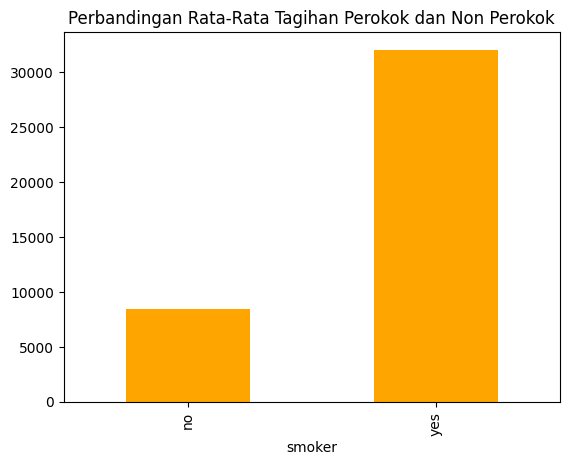

In [ ]:
bars = np.round(df[['charges', 'smoker']]
                .groupby(['smoker'])['charges']
                .mean(), 2).plot(kind='bar',
                                 color='orange', 
                                 title='Perbandingan Rata-Rata Tagihan Perokok dan Non Perokok')


## 📊 Perbandingan Rata-Rata Tagihan Perokok dan Non-Perokok

Grafik di atas menunjukkan **rata-rata tagihan asuransi (`charges`)** berdasarkan status merokok (`smoker`) peserta:

- **Perokok (`yes`)** memiliki rata-rata tagihan sekitar **33.000**.
- **Non-perokok (`no`)** memiliki rata-rata tagihan sekitar **8.000**.

### 🔍 Insight:
Terdapat **selisih yang sangat besar** antara perokok dan non-perokok. Ini menunjukkan bahwa:
- Perokok memiliki risiko kesehatan yang lebih tinggi.
- Hal ini menyebabkan **biaya asuransi mereka jauh lebih mahal**.

In [126]:
np.round(df[['bmi', 'sex']].groupby(['sex'])['bmi'].mean(), 2)

sex
female    30.38
male      30.94
Name: bmi, dtype: float64

In [94]:
np.round(df[['bmi', 'smoker']].groupby(['smoker'])['bmi'].mean(), 2)

smoker
no     30.65
yes    30.71
Name: bmi, dtype: float64

In [127]:
region_prop = (df['region']).value_counts()  # Menghitung jumlah pengguna di setiap region
print("Jumlah pengguna tiap region:")
print(region_prop)                           # Menampilkan hasil perhitungan

Jumlah pengguna tiap region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


[Text(0.5, 1.0, 'Proporsi Peserta Asuransi pada Setiap Region')]

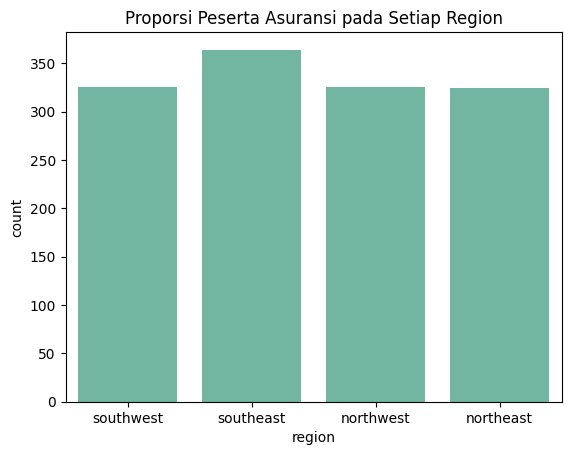

In [129]:
# Mengatur palette warna agar lebih menarik dan berbeda dari default
sns.set_palette("Set2")  # Bisa diganti: "Pastel1", "Set3", "Dark2", dll

# Membuat countplot jumlah peserta asuransi per region
sns.countplot(x=df['region']).set(title='Proporsi Peserta Asuransi pada Setiap Region')


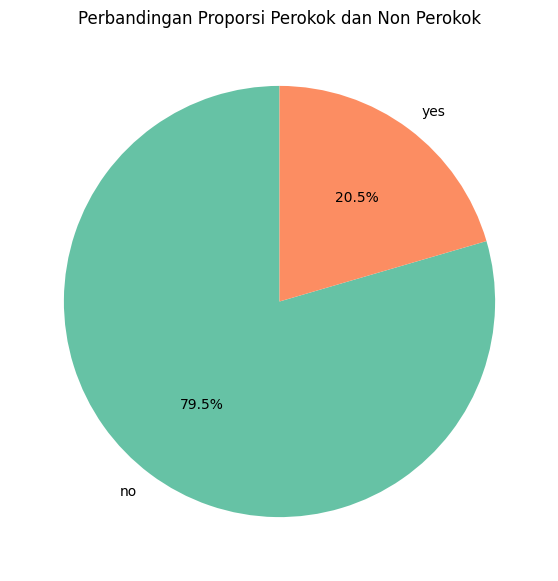

In [140]:
# Visualisasi proporsi perokok dan non-perokok dengan pie chart

# Mengatur warna agar lebih menarik
colors = ['#66c2a5', '#fc8d62']  # 'no' = hijau kebiruan, 'yes' = oranye

# Membuat pie chart
fig1 = df['smoker'].value_counts().plot(
    kind='pie',                      # Jenis plot
    startangle=90,                   # Rotasi agar dimulai dari atas
    title='Perbandingan Proporsi Perokok dan Non Perokok',
    figsize=(7, 7),                  # Ukuran plot
    autopct='%1.1f%%',              # Menampilkan persentase
    colors=colors,                   # Warna yang digunakan
    legend=False,                    # Tidak perlu legend karena label sudah ada
    ylabel=''                        # Menghilangkan label sumbu Y
)

In [143]:
smoker_f = df['smoker'].where(df['sex']=='female').value_counts()
p_smoker_f = smoker_f[1] / smoker_f.sum()
print("Peluang jenis kelamin perempuan diketahui perokok adalah sebesar {}".format(np.round(p_smoker_f, 2)))

Peluang jenis kelamin perempuan diketahui perokok adalah sebesar 0.17


C:\Users\dzaki\AppData\Local\Temp\ipykernel_2544\774611025.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_smoker_f = smoker_f[1] / smoker_f.sum()


In [144]:
smoker_m = df['smoker'].where(df['sex']=='male').value_counts()
p_smoker_m = smoker_m[1] / smoker_m.sum()
print("Peluang jenis kelamin laki - laki diketahui perokok adalah sebesar {}".format(np.round(p_smoker_m, 2)))

Peluang jenis kelamin laki - laki diketahui perokok adalah sebesar 0.24


C:\Users\dzaki\AppData\Local\Temp\ipykernel_2544\619747092.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_smoker_m = smoker_m[1] / smoker_m.sum()


## 🎯 Interpretasi Peluang Merokok Berdasarkan Jenis Kelamin

### 📌 Apa itu nilai peluang (probabilitas)?
Nilai seperti `0.17` atau `0.24` adalah **peluang (probabilitas)**, yaitu ukuran kemungkinan suatu kejadian terjadi.

---

### 📊 Contoh Hasil
| Jenis Kelamin | Peluang Merokok | Interpretasi |
|---------------|------------------|--------------|
| Perempuan     | 0.17 (17%)       | Dari 100 perempuan, sekitar 17 orang adalah perokok |
| Laki-laki     | 0.24 (24%)       | Dari 100 laki-laki, sekitar 24 orang adalah perokok |

C:\Users\dzaki\AppData\Local\Temp\ipykernel_2544\3515783836.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=df, palette='coolwarm')


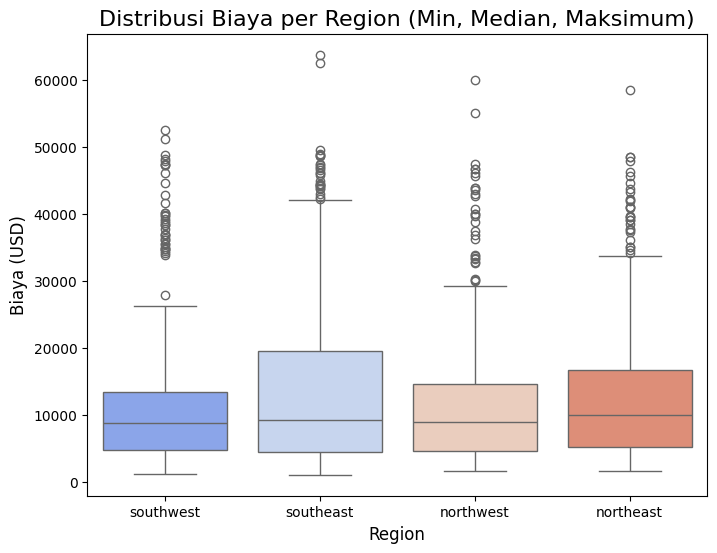

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi boxplot untuk menunjukkan distribusi
plt.figure(figsize=(8,6))
sns.boxplot(x='region', y='charges', data=df, palette='coolwarm')

# Menambahkan title dan labels
plt.title('Distribusi Biaya per Region (Min, Median, Maksimum)', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Biaya (USD)', fontsize=12)

# Tampilkan plot
plt.show()


## 📊 Distribusi Biaya Medis (`charges`) per Region

Visualisasi ini menunjukkan distribusi biaya medis (`charges`) berdasarkan 4 wilayah/regional yaitu:
- **Southwest**
- **Southeast**
- **Northwest**
- **Northeast**

### 🔍 Penjelasan:

- **Sumbu X (horizontal)**: Menunjukkan nilai `charges`, yaitu total biaya medis (asuransi).
- **Sumbu Y (vertikal)**: Menunjukkan jumlah orang (`count`) yang memiliki nilai `charges` tertentu.
- Setiap panel menunjukkan distribusi untuk **region** yang berbeda, artinya kita bisa membandingkan bagaimana distribusi `charges` di setiap wilayah.

### 🧠 Insight Awal:

- Di **semua region**, mayoritas orang memiliki `charges` di bawah **20.000**.
- Ada sedikit orang yang memiliki `charges` sangat tinggi (hingga lebih dari **60.000**) — ini disebut **outlier**.
- **Southeast** tampak memiliki distribusi `charges` tinggi yang lebih menyebar daripada region lain, kemungkinan karena faktor-faktor seperti banyaknya perokok, BMI tinggi, atau kondisi kesehatan tertentu di wilayah tersebut.

### ✅ Kesimpulan Awal:
Distribusi biaya medis secara umum mirip di keempat region, tapi:
- **Southeast** menunjukkan lebih banyak orang dengan `charges` tinggi dibanding region lain.
- Ini bisa menjadi tanda bahwa region ini memiliki lebih banyak risiko kesehatan atau kebiasaan yang menyebabkan biaya medis lebih mahal.


In [153]:
# Ambil jumlah total orang yang memiliki tagihan kesehatan lebih dari 16.7K
sample = df[df['charges'] > 16700].value_counts().sum()

# Hitung jumlah orang yang memiliki BMI > 25 dan tagihan kesehatan > 16.7K
jumlah_up = df.where((df['bmi'] > 25) & (df['charges'] > 16700)).value_counts().sum()

# Hitung jumlah orang yang memiliki BMI < 25 dan tagihan kesehatan > 16.7K
jumlah_down = df.where((df['bmi'] < 25) & (df['charges'] > 16700)).value_counts().sum()

# Hitung probabilitas bahwa seseorang dengan tagihan > 16.7K memiliki BMI > 25
p_up = jumlah_up / sample

# Hitung probabilitas bahwa seseorang dengan tagihan > 16.7K memiliki BMI < 25
p_down = jumlah_down / sample

# Cetak hasil probabilitas untuk BMI > 25 dan charges > 16.7K
print("Probability orang dengan BMI > 25 dan tagihan kesehatan > 16.7K adalah {}".format(np.round(p_up, 2)))

# Cetak hasil probabilitas untuk BMI < 25 dan charges > 16.7K
print("Probability orang dengan BMI < 25 dan tagihan kesehatan > 16.7K adalah {}".format(np.round(p_down, 2)))


Probability orang dengan BMI > 25 dan tagihan kesehatan > 16.7K adalah 0.85
Probability orang dengan BMI < 25 dan tagihan kesehatan > 16.7K adalah 0.15


## 📊 Kesimpulan Analisis BMI dan Tagihan Kesehatan

- Dari semua orang yang memiliki **tagihan kesehatan lebih dari 16.700**:
  - **85%** di antaranya memiliki **BMI > 25** (kelebihan berat badan).
  - **15%** sisanya memiliki **BMI < 25** (berat badan normal atau kurus).

### ✅ Kesimpulan Sederhana:
Orang dengan **BMI lebih dari 25** cenderung memiliki **biaya kesehatan yang lebih tinggi**.

Ini bisa menunjukkan bahwa **kelebihan berat badan berkaitan dengan risiko kesehatan dan pengeluaran medis yang lebih besar**.


In [102]:
# Sample masih menggunakan pada point 3.1 sebelumnya karena sama

# Jumlah orang untuk poin 2a dan 2b
jumlah_yes = df.where((df['smoker']=='yes') & (df['bmi']>25) & (df['charges']>16700)).value_counts().sum()
jumlah_no = df.where((df['smoker']=='no') & (df['bmi']>25) & (df['charges']>16700)).value_counts().sum()

# Probability
p_yes = jumlah_yes/sample
p_no = jumlah_no/sample

# Print
print("Probability orang perokok dengan BMI > 25 dan tagihan kesehatan > 16.7K adalah {}".format(np.round(p_yes, 2)))
print("Probability orang non perokok dengan BMI > 25 dan tagihan kesehatan > 16.7K adalah {}".format(np.round(p_no, 2)))

Probability orang perokok dengan BMI > 25 dan tagihan kesehatan > 16.7K adalah 0.64
Probability orang non perokok dengan BMI > 25 dan tagihan kesehatan > 16.7K adalah 0.2


## 🚬 Analisis Perokok, BMI, dan Tagihan Kesehatan

- Dari semua orang yang memiliki **tagihan kesehatan > 16.700** dan **BMI > 25**:
  - **64%** adalah **perokok**.
  - **20%** adalah **non-perokok**.

### ✅ Kesimpulan Sederhana:
Perokok yang memiliki kelebihan berat badan (**BMI > 25**) lebih berisiko memiliki **biaya kesehatan tinggi**, dibandingkan non-perokok dengan BMI sama.


<Axes: title={'center': 'Pearson Correlation pada Dataset'}>

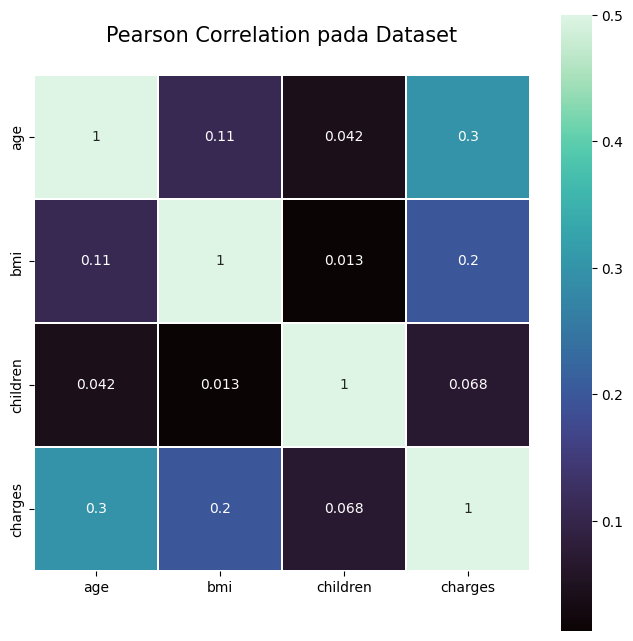

In [103]:
data_corr = df[['age', 'bmi', 'children', 'charges']].corr(method='pearson')
colormap = plt.cm.RdBu
plt.figure(figsize=(8,8))
plt.title('Pearson Correlation pada Dataset', y=1.05, size=15)
sns.heatmap(data_corr,linewidths=0.1,vmax=0.5,
            square=True, cmap='mako', linecolor='white', annot=True)

## 🔎 Kesimpulan Korelasi Pearson

Berdasarkan analisis korelasi:

- Terdapat hubungan **positif lemah** antara:
  - `age` dan `charges` (r = 0.30)
  - `bmi` dan `charges` (r = 0.20)

- Korelasi antara `children` dan `charges` sangat rendah (r = 0.068), artinya **jumlah anak tidak banyak memengaruhi tagihan kesehatan**.

### ✅ Simpulan:
Semakin **tua** dan semakin **tinggi BMI**, kemungkinan besar **biaya kesehatan akan lebih tinggi**, meskipun korelasinya masih tergolong lemah.


In [160]:
# Function untuk keputusan berdasarkan nilai p-value
alpha = 0.05  # Batas signifikan (5%)

# Fungsi untuk memberikan interpretasi hasil uji
def result(p_value):
    if p_value <= alpha:
        print('Tolak H₀ (ada hubungan atau perbedaan yang signifikan)')
    else:
        print('Tidak ada cukup bukti untuk menunjukkan perbedaan (H₀ tidak ditolak)')

In [176]:
# Membuat tabel kontingensi antara kolom 'smoker' dan 'sex'
cont = pd.crosstab(df['smoker'], df['sex'])

# Mengambil nilai dari tabel kontingensi dalam bentuk array
# Baris pertama dan kedua dari tabel diambil nilainya untuk uji chi-square
value = np.array([cont.iloc[0][0:2].values, cont.iloc[1][0:2].values])

# Menghitung nilai uji Chi-Square
# c: nilai statistik chi-square
# p: nilai p-value
# dof: derajat kebebasan
# expected: nilai ekspektasi dari tabel kontingensi
c, p, dof, expected = stats.chi2_contingency(value)

# Menampilkan nilai p-value
print('P-value:', p)

# Menentukan keputusan berdasarkan p-value
result(p)



P-value: 0.006548143503580697
Tolak H₀ (ada hubungan atau perbedaan yang signifikan)


In [186]:
# Mengambil data 'charges' untuk laki-laki
male = df[df['sex'] == 'male']['charges']

# Mengambil data 'charges' untuk perempuan
female = df[df['sex'] == 'female']['charges']

# Melakukan uji Levene untuk menguji apakah varians (keragaman) antara dua kelompok sama
stat, p = levene(male, female)

# Menampilkan nilai p-value dari uji Levene
print('P-value:', p)

# Menentukan kesimpulan berdasarkan p-value (pakai fungsi result yang sudah didefinisikan sebelumnya)
result(p)


P-value: 0.0016808765833903443
Tolak H₀ (ada hubungan atau perbedaan yang signifikan)


## Kesimpulan Analisis Statistik

### 🔍 Uji Hubungan antara Perokok dan Jenis Kelamin (Chi-Square Test)
- **P-value:** 0.0065
- **Keputusan:** Tolak H₀
- **Kesimpulan:** Terdapat **hubungan yang signifikan** antara status perokok dan jenis kelamin responden.

---

### 📊 Uji Perbedaan Varians Biaya Kesehatan antara Laki-laki dan Perempuan (Levene's Test)
- **P-value:** 0.0017
- **Keputusan:** Tolak H₀
- **Kesimpulan:** Terdapat **perbedaan varians yang signifikan** dalam biaya kesehatan antara laki-laki dan perempuan.

---

### ✅ Interpretasi Umum:
- Kedua uji menunjukkan hasil yang signifikan (p-value < 0.05), artinya **ada perbedaan atau hubungan nyata** dalam data yang dianalisis.


In [190]:
# Uji T arah kanan
st,p = stats.ttest_ind(male,female)
print('P-value:',(p/2))
result(p/2)

P-value: 0.01806636050296488
Tolak H₀ (ada hubungan atau perbedaan yang signifikan)


### Kesimpulan Uji T Satu Arah (Independent T-Test)

Berdasarkan hasil uji T dua sampel independen satu arah terhadap data `charges` antara laki-laki dan perempuan:

- **Hipotesis nol (H₀)**: Tidak ada perbedaan atau rata-rata charges laki-laki ≤ perempuan.
- **Hipotesis alternatif (H₁)**: Rata-rata charges laki-laki > perempuan (uji arah kanan).
- **P-value (arah kanan)**: 0.018
- **Alpha (α)**: 0.05

Karena **p-value < α**, maka kita **menolak H₀**.

✅ **Kesimpulan:** Terdapat **perbedaan yang signifikan** dalam rata-rata biaya kesehatan antara laki-laki dan perempuan, di mana **laki-laki cenderung memiliki biaya lebih tinggi**.
